## Generate a structural connectome using eigenmodes

This tutorial will demonstrate how to generate a structural connectivity matrix $G$ using the formula from [Normand *et al.* (2025)](https://www.biorxiv.org/content/10.1101/2025.09.17.676944v5):

$$
\displaystyle G_{ij}=\sum_{m=1}^k \frac{\psi_m(i)\psi_m^+(j)}{1+r_s^2\lambda_m}
$$

where:
- $G_{ij}$ denotes the connectivity strength between cortical vertices $i$ and $j$
- $\psi_m(i)$ denotes the amplitude of the $m^{th}$ geometric eigenmode at vertex $i$
- $\lambda_m$ denotes the $m^{th}$ eigenvalue
- $[\ \ ]^+$ denotes the Moore–Penrose pseudoinverse
- $r_s$ denotes the spatial length scale parameter
- $k$ denotes the number of modes used

As in the previous tutorial, we begin by initialising the EigenSolver with a cortical surface and medial wall mask. To reduce the plotting time, we can use the fsLR-4k mesh.

In [1]:
from importlib.resources import files
from nsbtools.io import load_data
from nsbtools.eigen import EigenSolver
from nsbtools.utils import unmask
from nsbtools.plotting import plot_surf, plot_heatmap

In [ ]:
# Load cortical surface and medial wall mask
rh_surf = load_data('surf', density='4k', hemi='R')
medmask = load_data('medmask', density='4k', hemi='R')

# Initialize solver with surface
solver = EigenSolver(rh_surf, mask=medmask, n_modes=200)

We can then call the `generate_connectome` class method:

In [3]:
G = solver.generate_connectome()

Solved Laplace-Beltrami eigenvalue problem, stored in self.emodes and self.evals.


Note that $r_s=9.53$ and $k=108$ are used by default, in line with the paper.

We can visualise the structural connectivity matrix using `plot_heatmap`, from the `plotting` module:

<Axes: >

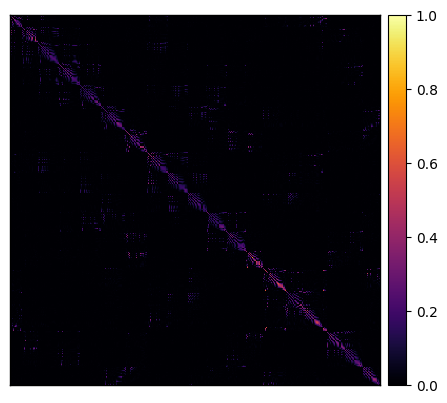

In [4]:
plot_heatmap(G, cmap='inferno', cbar=True)

We can also visualise the vertex-averaged connectivity on the cortical surface, this time using `plot_brain`:

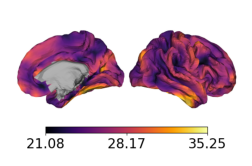

In [5]:
nodal_sc = G.sum(axis=0)

# Path to surface
rh_surfpath = files('nsbtools.data') / 'sp-human_tpl-fsLR_den-4k_hemi-R_midthickness.surf.gii'

plot_surf(
    rh_surfpath,
    unmask(nodal_sc, medmask),
    cmap='inferno',
    cbar=True
)

To explore the model further, we can generate another connectome but only use 5 modes instead of the default 108:

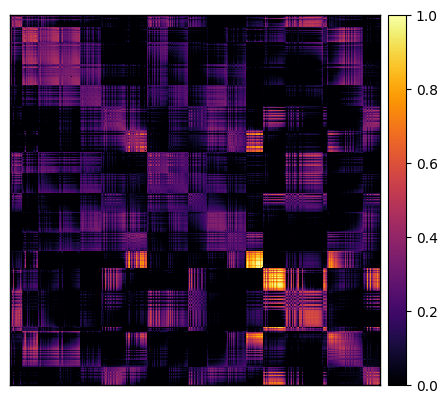

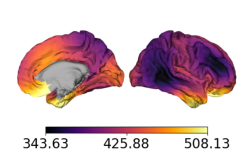

In [6]:
G_k5 = solver.generate_connectome(k=5)

plot_heatmap(G_k5, cmap='inferno', cbar=True)

plot_surf(
    rh_surfpath,
    unmask(G_k5.sum(axis=0), medmask),
    cmap='inferno',
    cbar=True
)

What about if we instead increase the spatial length scale parameter from 9.53 to 100?

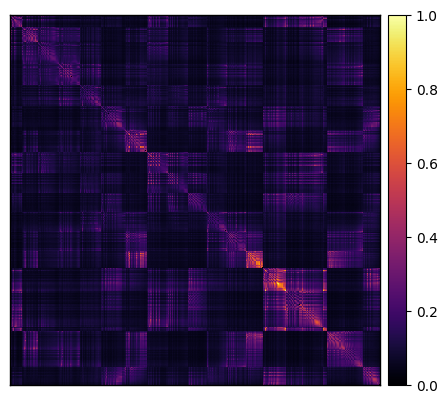

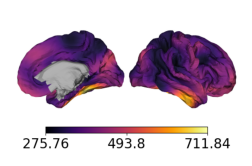

In [7]:
G_r100 = solver.generate_connectome(r=100)

plot_heatmap(G_r100, cmap='inferno', cbar=True)

plot_surf(
    rh_surfpath,
    unmask(G_r100.sum(axis=0), medmask),
    cmap='inferno',
    cbar=True
)